In [9]:
##First, we will import the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [10]:
##Now, we will find the file path from our directory
file_path = 'totals.csv'
df = pd.read_csv(file_path)

In [11]:
##Now, we will print the data and begin EDA
print("Sample data from the CSV:")
print(df.head())

Sample data from the CSV:
                             Establishment                            Address  \
0                     Wild Birds Unlimited     10549 Scripps Poway Pkwy. #B-3   
1                     Gilmore Orthodontics                  9870 Hibert St d9   
2                     Pinnacle Endodontics         10672 Wexford St Suite 265   
3               Scripps Poway Orthodontics  12112 Scripps Summit Dr., Suite F   
4  Saint Gregory the Great Catholic Church           11451 Blue Cypress Drive   

       Zip     Genre Review Number_Reviews  
0  92131.0  Services    4.7             20  
1  92131.0  Services      5             47  
2  92131.0  Services    4.6            107  
3  92131.0  Services    4.9             71  
4  92131.0  Services    4.7             23  


In [12]:
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
                Zip
count    172.000000
mean   92126.889535
std        4.125871
min    92121.000000
25%    92126.000000
50%    92126.000000
75%    92131.000000
max    92145.000000


In [13]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Establishment     1
Address           2
Zip               1
Genre             1
Review            8
Number_Reviews    8
dtype: int64


In [14]:
print("\nData types:")
print(df.dtypes)



Data types:
Establishment      object
Address            object
Zip               float64
Genre              object
Review             object
Number_Reviews     object
dtype: object


In [16]:
df['Review'] = pd.to_numeric(df['Review'], errors='coerce')

In [18]:
print("\nNumber of unique restaurants:", df['Establishment'].nunique())
print("Number of unique street addresses:", df['Establishment'].nunique())


Number of unique restaurants: 172
Number of unique street addresses: 172


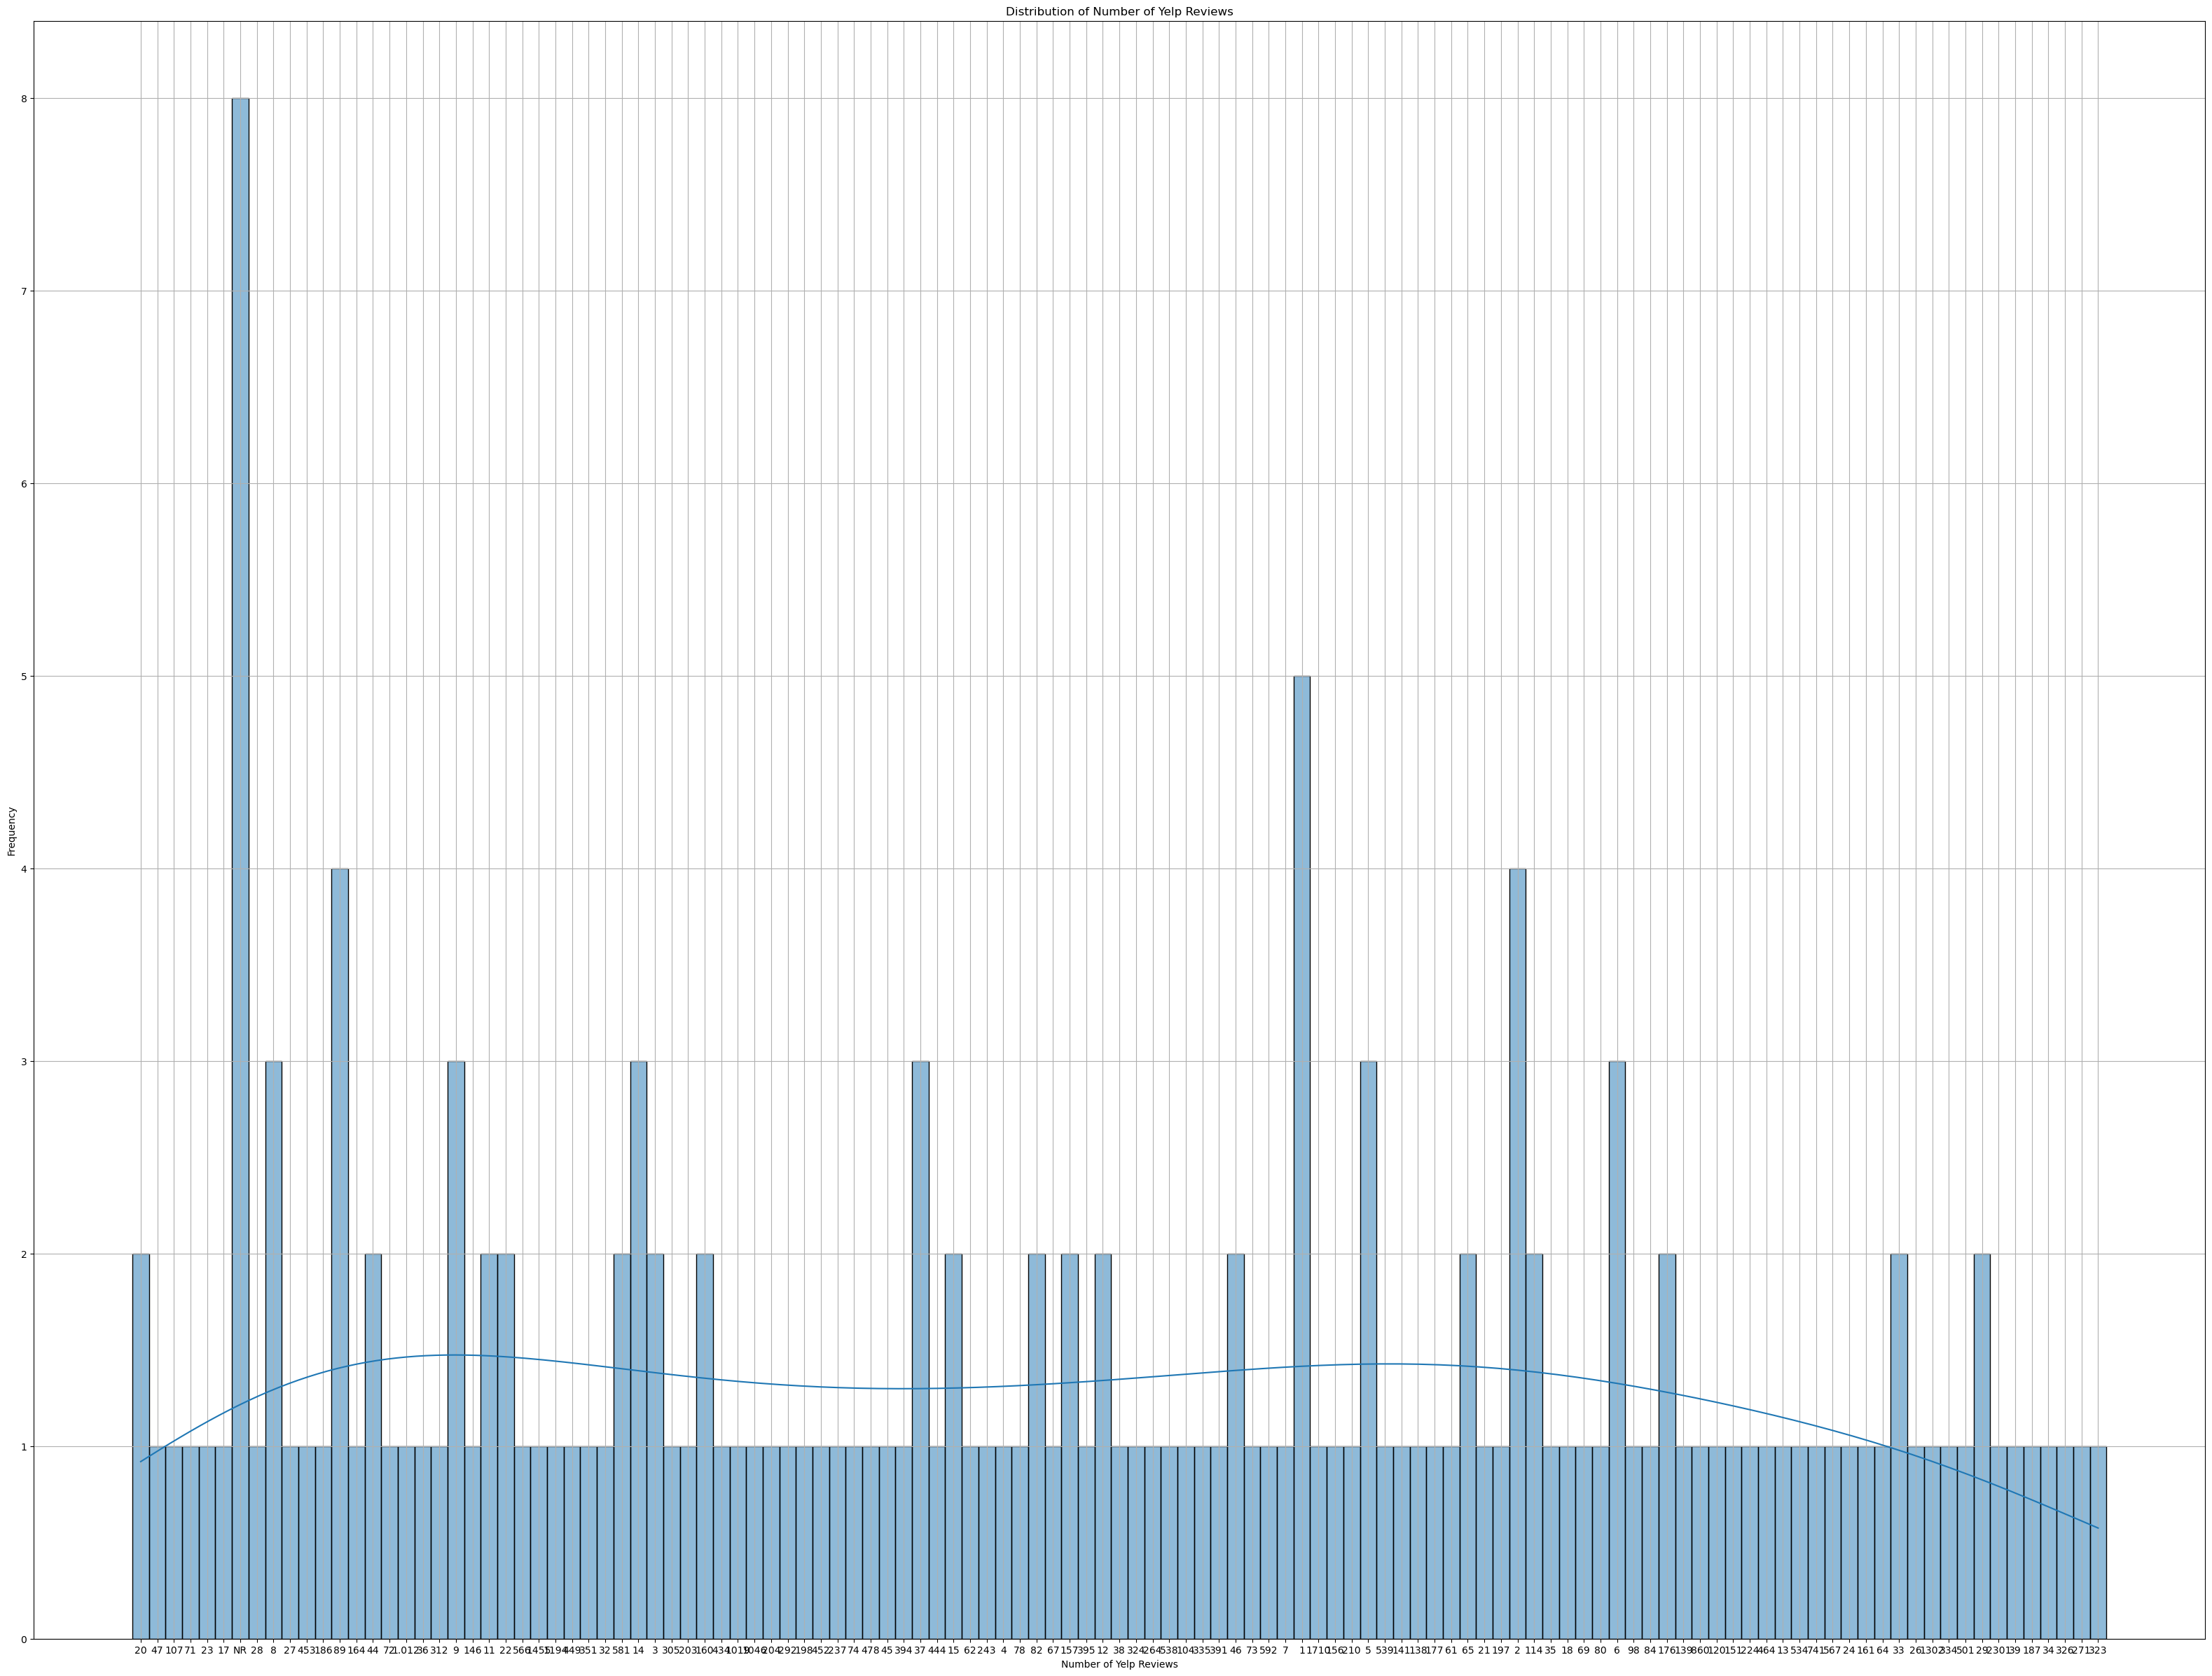

In [22]:
plt.figure(figsize=(40, 30))
sns.histplot(df['Number_Reviews'], bins=40, kde=True)
plt.title('Distribution of Number of Yelp Reviews')
plt.xlabel('Number of Yelp Reviews')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [26]:
Q1 = df['Review'].quantile(0.25)
Q3 = df['Review'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Review'] < lower_bound) | (df['Review'] > upper_bound)]
print("\nOutliers based on Yelp review ratings (using IQR method):")
print(outliers[['Establishment', 'Review']])


Outliers based on Yelp review ratings (using IQR method):
                        Establishment  Review
24            Ron's Pharmacy Services     2.1
72                       Sunrun Solar     1.9
90              L&L Hawaiian Barbecue     1.4
110          Coffman Specialties Inc.     1.0
113  Lombardi Contracting Corporation     1.5
138                      Vamonos Vans     1.0
139           Imperial Synthetic High     2.2


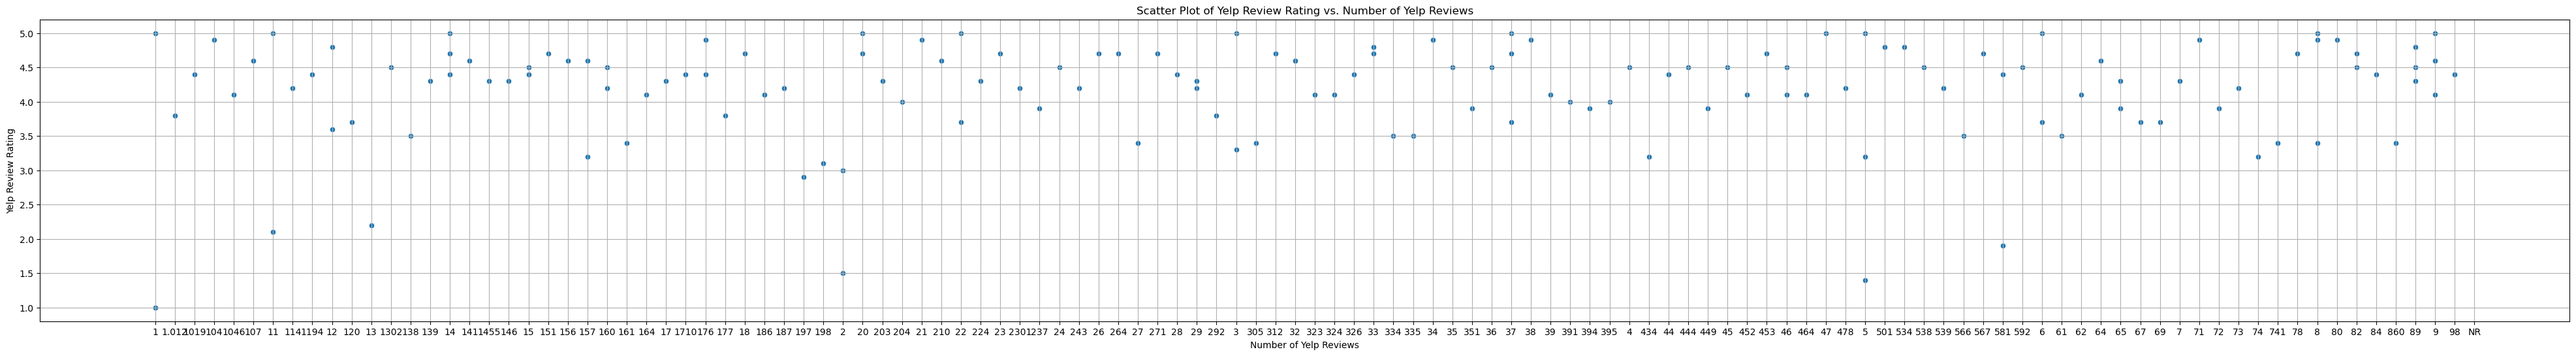

In [38]:
df_sorted = df.sort_values(by='Number_Reviews')
plt.figure(figsize=(50, 6))
sns.scatterplot(x='Number_Reviews', y='Review', data=df_sorted)
plt.title('Scatter Plot of Yelp Review Rating vs. Number of Yelp Reviews')
plt.xlabel('Number of Yelp Reviews')
plt.ylabel('Yelp Review Rating')
plt.grid(True)
plt.show()

/Users/mehrisadri/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


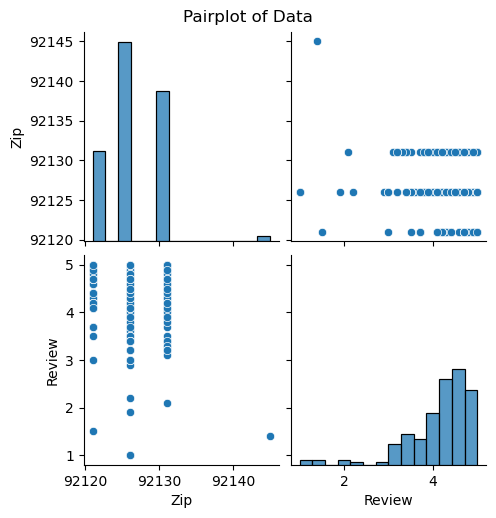

In [36]:
sns.pairplot(df)
plt.suptitle('Pairplot of Data', y=1.02)
plt.show()

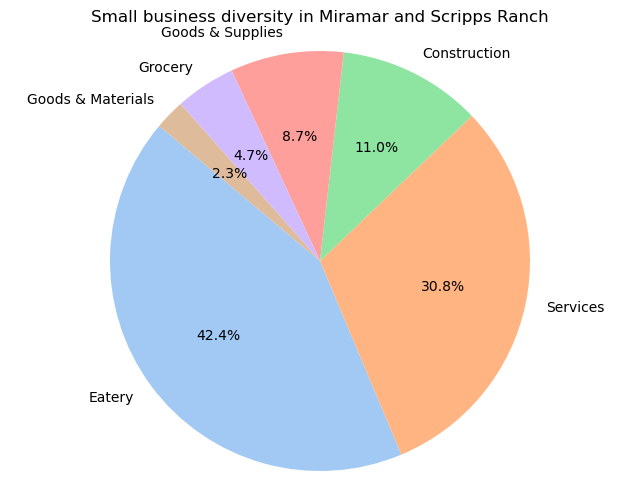

In [40]:
genre_counts = df['Genre'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Small business diversity in Miramar and Scripps Ranch')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()